Ch09 祖成 22019207057

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy import integrate

In [4]:
import sympy

In [5]:
sympy.init_printing()

In [6]:
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")

In [7]:
T = sympy.Function("T")

In [8]:
ode = T(t).diff(t) + k*(T(t) - Ta)

//anaconda3/envs/tensorflow/lib/python3.6/site-packages/sympy/core/relational.py:490: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


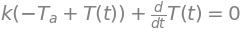

In [9]:
sympy.Eq(ode)

In [10]:
ode_sol = sympy.dsolve(ode)
ode_sol

In [11]:
ode_sol.lhs

In [12]:
ode_sol.rhs

In [13]:
ics = {T(0): T0}

In [14]:
ics

In [15]:
C_eq = ode_sol.subs(t, 0).subs(ics)

In [16]:
C_eq

In [17]:
C_sol = sympy.solve(C_eq)
C_sol

In [18]:
ode_sol.subs(C_sol[0])

In [19]:
def apply_ics(sol, ics, x, known_params):

    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

In [20]:
ode_sol

In [21]:
apply_ics(ode_sol, ics, t, [k, Ta])

In [22]:
t, omega0 = sympy.symbols("t, omega_0", positive=True)
gamma = sympy.symbols("gamma", complex=True)

In [23]:
x = sympy.Function("x")

In [24]:
ode_sol

In [25]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}

In [26]:
ics

⎧         ⎛d       ⎞│      ⎫
⎨x(0): 1, ⎜──(x(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [28]:
x = sympy.symbols("x")

In [29]:
y = sympy.Function("y")

In [30]:
f = y(x)**2 + x

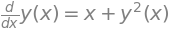

In [31]:
sympy.Eq(y(x).diff(x), f)

In [32]:
sympy.dsolve(y(x).diff(x) - f)

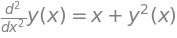

In [33]:
sympy.Eq(y(x).diff(x, x), f)

In [35]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')

    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)
    
    return ax

In [36]:
x = sympy.symbols("x")

In [37]:
y = sympy.Function("y")

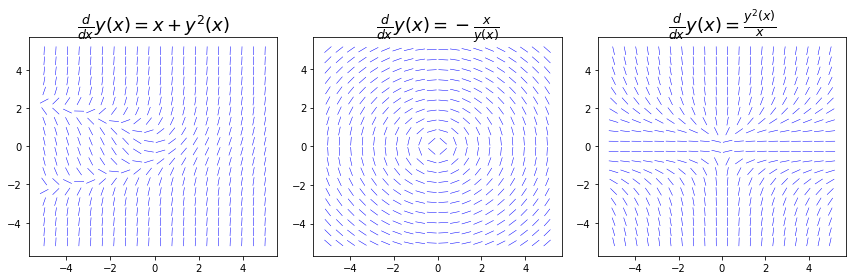

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
plot_direction_field(x, y(x), y(x)**2 / x, ax=axes[2])

fig.tight_layout()

In [39]:
x = sympy.symbols("x")

In [40]:
y = sympy.Function("y")

In [41]:
f = y(x)**2 + x

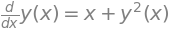

In [42]:
sympy.Eq(y(x).diff(x), f)

In [43]:
ics = {y(0): 0}

In [44]:
ode_sol = sympy.dsolve(y(x).diff(x) - f, ics=ics)
ode_sol

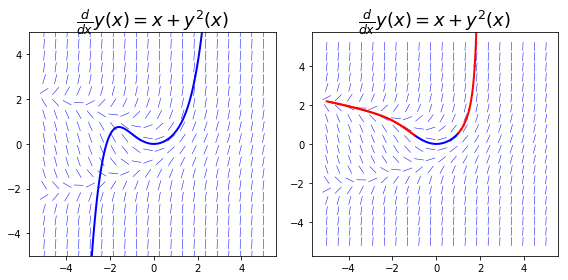

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

plot_direction_field(x, y(x), f, ax=axes[0])
x_vec = np.linspace(-3, 3, 100)
axes[0].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())(x_vec), 'b', lw=2)
axes[0].set_ylim(-5, 5)

plot_direction_field(x, y(x), f, ax=axes[1])
x_vec = np.linspace(-1, 1, 100)
axes[1].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())(x_vec), 'b', lw=2)

ode_sol_m = ode_sol_p = ode_sol
dx = 0.125
for x0 in np.arange(1, 2., dx):
    x_vec = np.linspace(x0, x0 + dx, 100)
    ics = {y(x0): ode_sol_p.rhs.removeO().subs(x, x0)}
    ode_sol_p = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_p.rhs.removeO())(x_vec), 'r', lw=2)

for x0 in np.arange(1, 5, dx):
    x_vec = np.linspace(-x0-dx, -x0, 100)
    ics = {y(-x0): ode_sol_m.rhs.removeO().subs(x, -x0)}
    ode_sol_m = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_m.rhs.removeO())(x_vec), 'r', lw=2)
    
fig.tight_layout()

In [46]:
t = sympy.symbols("t", positive=True)

In [47]:
y = sympy.Function("y")

In [49]:
ode = y(t).diff(t, 2) + 2 * y(t).diff(t) + 10 * y(t) - 2 * sympy.sin(3*t)

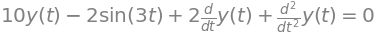

In [50]:
sympy.Eq(ode)

In [52]:
s, Y = sympy.symbols("s, Y", real=True)

In [53]:
L_y = sympy.laplace_transform(y(t), t, s)

In [54]:
L_y

In [55]:
L_ode = sympy.laplace_transform(ode, t, s, noconds=True)

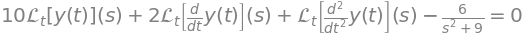

In [56]:
sympy.Eq(L_ode)

In [57]:
def laplace_transform_derivatives(e):

    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = len(d.args) - 1
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0)
                         for i in range(1, n+1)]))
        
    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    
    return e

In [58]:
L_ode_2 = laplace_transform_derivatives(L_ode)

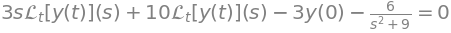

In [59]:
sympy.Eq(L_ode_2)

In [60]:
L_ode_3 = L_ode_2.subs(L_y, Y)

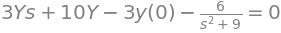

In [61]:
sympy.Eq(L_ode_3)

In [62]:
ics = {y(0): 1, y(t).diff(t).subs(t, 0): 0}

In [63]:
ics

⎧         ⎛d       ⎞│      ⎫
⎨y(0): 1, ⎜──(y(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [64]:
L_ode_4 = L_ode_3.subs(ics)

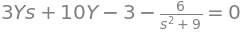

In [65]:
sympy.Eq(L_ode_4)

In [66]:
Y_sol = sympy.solve(L_ode_4, Y)

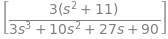

In [67]:
Y_sol

In [68]:
y_sol = sympy.inverse_laplace_transform(Y_sol[0], s, t)

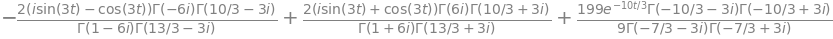

In [69]:
sympy.simplify(y_sol)

In [70]:
x = sympy.symbols("x")

In [71]:
y = sympy.Function("y")

In [72]:
f = y(x)**2 + x

In [73]:
f_np = sympy.lambdify((y(x), x), f)

In [74]:
y0 = 0

In [75]:
xp = np.linspace(0, 1.9, 100)

In [76]:
yp = integrate.odeint(f_np, y0, xp)

In [77]:
xm = np.linspace(0, -5, 100)

In [78]:
ym = integrate.odeint(f_np, y0, xm)

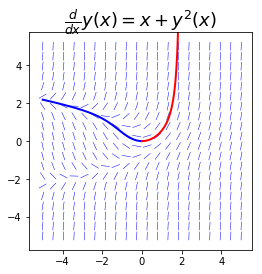

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)

In [80]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7

In [81]:
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y,
            c * x * y - d * y]

In [82]:
xy0 = [600, 400]

In [83]:
t = np.linspace(0, 50, 250)

In [84]:
xy_t = integrate.odeint(f, xy0, t)

In [85]:
xy_t.shape

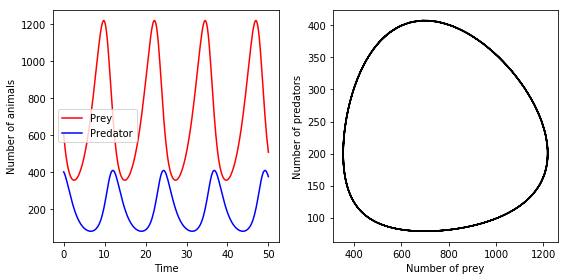

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].plot(t, xy_t[:,0], 'r', label="Prey")
axes[0].plot(t, xy_t[:,1], 'b', label="Predator")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Number of animals")
axes[0].legend()

axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Number of prey")
axes[1].set_ylabel("Number of predators")
fig.tight_layout()


In [87]:
def f(xyz, t, rho, sigma, beta):
    x, y, z = xyz
    return [sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z]

In [88]:
sigma, rho, beta = 8, 28, 8/3.0

In [89]:
t = np.linspace(0, 25, 10000)

In [90]:
xyz0 = [1.0, 1.0, 1.0]

In [91]:
xyz1 = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))

In [92]:
xyz2 = integrate.odeint(f, xyz0, t, args=(sigma, rho, 0.6*beta))

In [93]:
xyz3 = integrate.odeint(f, xyz0, t, args=(2*sigma, rho, 0.6*beta))

In [94]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

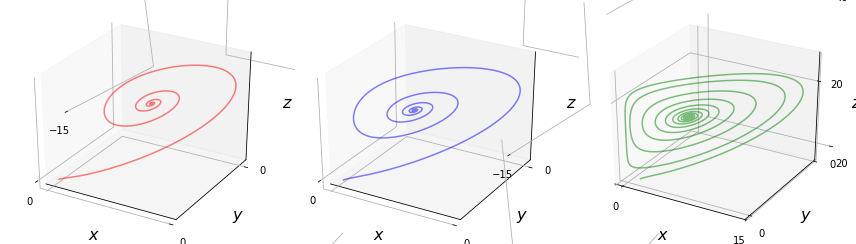

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5), subplot_kw={'projection': '3d'})

for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

fig.tight_layout()

In [96]:
def f(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    
    return [y[1], 
            - k1/m1 * y[0] + k2/m1 * (y[2] - y[0]) - g1/m1 * y[1], 
            y[3], 
            - k2/m2 * (y[2] - y[0]) - g2/m2 * y[3] ]

In [97]:
m1, k1, g1 = 1.0, 10.0, 0.5

In [98]:
m2, k2, g2 = 2.0, 40.0, 0.25

In [99]:
args = (m1, k1, g1, m2, k2, g2)

In [100]:
y0 = [1.0, 0, 0.5, 0]

In [101]:
t = np.linspace(0, 20, 1000)

In [102]:
r = integrate.ode(f)

In [103]:
r.set_integrator('lsoda');

In [104]:
r.set_initial_value(y0, t[0]);

In [105]:
r.set_f_params(args);

In [106]:
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

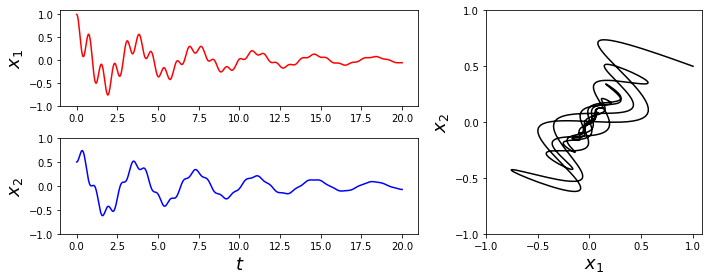

In [107]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])

ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])

ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])

fig.tight_layout()

In [108]:
def jac(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    
    return [[0, 1, 0, 0], 
            [- k1/m1 - k2/m1, - g1/m1 * y[1], k2/m1, 0],
            [0, 0, 1, 0],
            [k2/m2, 0, - k2/m2, - g2/m2]]

In [109]:
r = integrate.ode(f, jac)

In [110]:
r.set_jac_params(args);

In [111]:
t, g, m1, l1, m2, l2 = sympy.symbols("t, g, m_1, l_1, m_2, l_2")

In [112]:
theta1, theta2 = sympy.symbols("theta_1, theta_2", cls=sympy.Function)

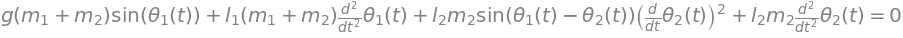

In [113]:
ode1 = sympy.Eq((m1+m2)*l1 * theta1(t).diff(t,t) +
                m2*l2 * theta2(t).diff(t,t) +
                m2*l2 * theta2(t).diff(t)**2 * sympy.sin(theta1(t)-theta2(t)) + 
                g*(m1+m2) * sympy.sin(theta1(t)))
ode1

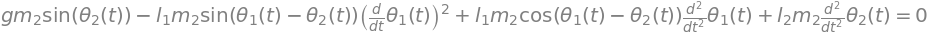

In [114]:
ode2 = sympy.Eq(m2*l2 * theta2(t).diff(t,t) +
                m2*l1 * theta1(t).diff(t,t) * sympy.cos(theta1(t)-theta2(t)) -
                m2*l1 * theta1(t).diff(t)**2 * sympy.sin(theta1(t) - theta2(t)) +
                m2*g * sympy.sin(theta2(t)))
ode2

In [115]:
y1, y2, y3, y4 = sympy.symbols("y_1, y_2, y_3, y_4", cls=sympy.Function)

In [116]:
varchange = {theta1(t).diff(t, t): y2(t).diff(t), 
             theta1(t): y1(t),
             theta2(t).diff(t, t): y4(t).diff(t), 
             theta2(t): y3(t)}

In [117]:
ode1_vc = ode1.subs(varchange)

In [118]:
ode2_vc = ode2.subs(varchange)

In [119]:
ode3 = y1(t).diff(t) - y2(t)

In [120]:
ode4 = y3(t).diff(t) - y4(t)

In [121]:
y = sympy.Matrix([y1(t), y2(t), y3(t), y4(t)])

In [122]:
vcsol = sympy.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t),dict=True)

In [123]:
f = y.diff(t).subs(vcsol[0])


In [124]:
params = {m1: 5.0, l1: 2.0, m2: 1.0, l2: 1.0, g: 10.0}

In [125]:
_f_np = sympy.lambdify((t, y), f.subs(params), 'numpy')

In [126]:
f_np = lambda _t, _y, *args: _f_np(_t, _y)

In [127]:
jac = sympy.Matrix([[fj.diff(yi) for yi in y] for fj in f])

In [128]:
_jac_np = sympy.lambdify((t, y), jac.subs(params), 'numpy')

In [129]:
jac_np = lambda _t, _y, *args: _jac_np(_t, _y)

In [130]:
y0 = [2.0, 0, 0, 0]

In [131]:
tt = np.linspace(0, 20, 1000)

In [132]:
r = integrate.ode(f_np, jac_np).set_initial_value(y0, tt[0])

In [137]:
dt = tt[1] - tt[0]
yy = np.zeros((len(tt), len(y0)))
idx = 0
while r.successful() and r.t < tt[-1]:
    yy[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

In [145]:
theta1_np, theta2_np = yy[:, 0], yy[:, 2]

In [146]:
x1 = params[l1] * np.sin(theta1_np)
y1 = -params[l1] * np.cos(theta1_np)
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)

ValueError: x and y must have same first dimension, but have shapes (1,) and (1000,)

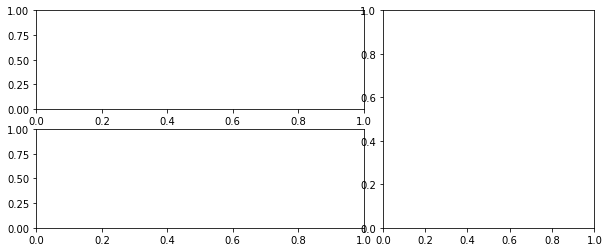

In [144]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, x1, 'r')
ax1.plot(t, y1, 'b')
ax1.set_ylabel('$x_1, y_1$', fontsize=18)
ax1.set_yticks([-3, 0, 3])

ax2.plot(t, x2, 'r')
ax2.plot(t, y2, 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2, y_2$', fontsize=18)
ax2.set_yticks([-3, 0, 3])

ax3.plot(x1, y1, 'r')
ax3.plot(x2, y2, 'b', lw=0.5)
ax3.set_xlabel('$x$', fontsize=18)
ax3.set_ylabel('$y$', fontsize=18)
ax3.set_xticks([-3, 0, 3])
ax3.set_yticks([-3, 0, 3])

fig.tight_layout()
